# Balance de energía

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import import_ipynb
import pandas as pd

In [2]:
from calculos_Q_invierno import Q_oficinas, dot_Q_oficinas, T_oficinas, T_exterior_inv
Q_oficinas_invierno = Q_oficinas
dot_Q_oficinas_invierno = dot_Q_oficinas
T_oficinas_invierno = T_oficinas
T_exterior_invierno = T_exterior_inv

from calculos_Q_verano import Q_oficinas, dot_Q_oficinas, T_oficinas, T_exterior_ver
Q_oficinas_verano = Q_oficinas
dot_Q_oficinas_verano = dot_Q_oficinas
T_oficinas_verano = T_oficinas
T_exterior_verano = T_exterior_ver

Coeficiente global de transferencia de calor tabique tipo 1: 0.62 W/Km^2
Coeficiente global de transferencia de calor tabique tipo 2: 0.62 W/Km^2
Coeficiente global de transferencia de calor tabique tipo 3: 0.62 W/Km^2
Coeficiente global de transferencia de calor tabique tipo 4 por unidad de ancho: 0.57 W/Km
Coeficiente global de transferencia de calor tabique tipo 5: 0.66 W/Km^2
Coeficiente global de transferencia de calor muro hormigón armado: 8.15 W/Km^2
Coeficiente global de transferencia de calor en el suelo: 6.52 W/Km^2
Conductividad térmica aire quieto a 25 C: 0.0258 W/mK
Coeficiente global de transferencia de calor ventana tipo 1: 2.10 W/Km^2
Coeficiente global de transferencia de calor ventana MV17: 200.00 W/Km^2
Coeficiente global de transferencia de calor ventana MV18: 200.00 W/Km^2
Coeficiente global de transferencia de calor ventana MV19: 200.00 W/Km^2
Coeficiente global de transferencia de calor puerta tipo PM05: 2.37 W/Km^2
Coeficiente global de transferencia de calor im

Humedad:
Media humedad relativa:
- Diciembre 23: 51.5
- Enero 24: 50.1
- Febrero 24: 53.5
- Marzo 24: 55.6
--------
- Junio 24: 84.9
- Julio 24: 76.9
- Agosto 24: 78.1
- Septiembre 24: 67.4

In [3]:
humedad_verano = 52.675
humedad_invierno = 78.825

**Balance de masa**

$$
\dot{m}W_{exterior} + \dot{m}_{gen} = \dot{m}W_{interior}
$$

**Balance de energía**

$$
\dot{Q}_{in} + \dot{Q}_{gen} + \dot{m}h_{exterior} = \dot{Q}_{loss} + \dot{m}h_{interior}
$$

In [4]:
# Cálculo de Q_gen
mets = 1.5 * 58.2
n_personas = 1.5
peso = 84.9
altura = 1.75
area_superficial = 0.202 * peso**0.425 * altura**0.725
Q_gen_personas = n_personas * mets * area_superficial
print(f"Energía generada por las personas en la oficina: {Q_gen_personas:.2f} W")

Energía generada por las personas en la oficina: 262.09 W


Fórmulas de psicrometría

In [5]:
def humedad_absoluta(T, RH):
    """Calcula la humedad absoluta (kg/m3) a partir de la temperatura (°C) y la humedad relativa (%)."""
    # Presión de saturación del agua (Pa)
    P_sat = 610.78 * np.exp((17.27 * T) / (T + 237.3))
    # Presión parcial del vapor de agua (Pa)
    P_vapor = RH / 100 * P_sat
    # Humedad absoluta (kg/m3)
    humedad_abs = 0.622 * P_vapor / (101325 - P_vapor)   # Convertir a g/m3
    return humedad_abs

def entalpia_aire(T, RH):
    """Calcula la entalpía del aire (kJ/kg) a partir de la temperatura (°C) y la humedad relativa (%)."""
    humedad_abs = humedad_absoluta(T, RH) / 1000  # Convertir a kg/m3
    h = 1.006 * T + humedad_abs * (2501 + 1.86 * T)  # kJ/kg
    return h*1e3

m_gen = n_personas * 50/(1000*3600)  # kg/s, asumiendo 0.1 kg/s por persona CAMBIAR

## Cálculos para el invierno

Resolver sistema de ecuaciones para determinar $\dot{Q}_{in}$ y $\dot{m}$

In [16]:
W_interior = humedad_absoluta(T_oficinas, 50)  # kJ/kg, asumiendo 50% RH interior
W_exterior_inv = humedad_absoluta(T_exterior_inv, humedad_invierno)  # kJ/kg, asumiendo 80% RH exterior invierno

m = m_gen / (-W_exterior_inv + W_interior)  # kg/s
m = 2.14 * 4.14*3.78*2.71 * 1.1 /3600 # kg/s
print(f"Caudal de aire necesario para remover la humedad: {m:.5f} kg/s")

h_exterior_inv = entalpia_aire(T_exterior_inv, humedad_invierno)  # kJ/kg
h_interior = entalpia_aire(T_oficinas, 50)  # kJ/kg

total = 0
potencias = {}
for oficina, perdidas in dot_Q_oficinas_invierno.items():
    Q_in = perdidas + m * (h_interior - h_exterior_inv) - Q_gen_personas  # W
    total += Q_in


    #print(f'Perdidas --> {perdidas}\nHinterior --> {h_interior}\nHexterior --> {h_exterior_inv}\nm --> {m}\nQgen --> {Q_gen_personas}')
    print(f"Potencia necesaria para calefacción en {oficina} durante el invierno: {Q_in*1e-3:.2f} kW")
    potencias[oficina] = Q_in*1e-3  # kW
print(f"Potencia total necesaria para calefacción durante el invierno: {total*1e-3:.2f} kW")

Caudal de aire necesario para remover la humedad: 0.02773 kg/s
Potencia necesaria para calefacción en Oficina 1 durante el invierno: 1.48 kW
Potencia necesaria para calefacción en Oficina 2 durante el invierno: 1.62 kW
Potencia necesaria para calefacción en Oficina 3 durante el invierno: 1.62 kW
Potencia necesaria para calefacción en Oficina 4 durante el invierno: 1.73 kW
Potencia necesaria para calefacción en Oficina 5 durante el invierno: 1.73 kW
Potencia necesaria para calefacción en Oficina 6 durante el invierno: 1.62 kW
Potencia necesaria para calefacción en Oficina 7 durante el invierno: 1.62 kW
Potencia necesaria para calefacción en Oficina 8 durante el invierno: 1.86 kW
Potencia necesaria para calefacción en Oficina 9 durante el invierno: 1.87 kW
Potencia necesaria para calefacción en Oficina 10 durante el invierno: 1.59 kW
Potencia necesaria para calefacción en Oficina 11 durante el invierno: 1.59 kW
Potencia necesaria para calefacción en Oficina 12 durante el invierno: 1.54 k

In [25]:
def histograma_oficinas_con_total(datos, total, figsize=(14, 7)):
    """
    Crea un histograma con barras para cada oficina y el total como línea
    """
    # Configurar figura
    plt.figure(figsize=figsize)
    
    # Preparar datos
    oficinas = list(datos.keys())
    potencias = list(datos.values())
    x_pos = np.arange(len(oficinas))
    
    # Crear barras para oficinas
    barras = plt.bar(x_pos, potencias, 
                    color='skyblue', 
                    edgecolor='navy',
                    linewidth=1.2,
                    width=0.7,
                    label='Potencia por Oficina')
    
    # Línea del total
    plt.axhline(y=total, 
               color='red', 
               linestyle='--', 
               linewidth=3,
               alpha=0.8,
               label=f'Total Sistema: {total:.2f} kW')
    
    # Línea del promedio
    promedio = np.mean(potencias)
    plt.axhline(y=promedio, 
               color='green', 
               linestyle='-.', 
               linewidth=2,
               alpha=0.7,
               label=f'Promedio: {promedio:.2f} kW')
    
    # Personalizar ejes
    plt.xticks(x_pos, oficinas, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Etiquetas y título
    plt.xlabel('Oficinas', fontsize=12, fontweight='bold')
    plt.ylabel('Potencia (kW)', fontsize=12, fontweight='bold')
    plt.title('Potencia de Calefacción por Oficina vs Total del Sistema por mes INVIERNO', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Cuadrícula
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Leyenda
    plt.legend(loc='upper right', fontsize=10)
    
    # Añadir valores encima de las barras
    for i, (barra, potencia) in enumerate(zip(barras, potencias)):
        altura = barra.get_height()
        # Posicionar texto
        plt.text(barra.get_x() + barra.get_width()/2., 
                altura + 0.01,  # Un poco arriba de la barra
                f'{potencia:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", 
                         facecolor='white', 
                         edgecolor='gray', 
                         alpha=0.8))
    
    # Añadir anotación del total
    plt.annotate(f'TOTAL SISTEMA\n{total:.2f} kW',
                xy=(len(oficinas)-1, total),
                xytext=(len(oficinas)-3, total + 1.5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.8),
                fontsize=11,
                fontweight='bold',
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='lightyellow', 
                         edgecolor='red'))
    
    # Ajustar límites del eje Y para mejor visualización
    plt.ylim(0,  2) 
    
    # Añadir texto informativo en la parte inferior
    plt.figtext(0.5, 0.01, 
               f'Total de {len(oficinas)} oficinas | ' +
               f'Potencia máxima: {max(potencias):.2f} kW | ' +
               f'Potencia mínima: {min(potencias):.2f} kW | ' +
               f'Suma individual: {sum(potencias):.2f} kW',
               ha="center", 
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.5", 
                        facecolor='lightgray', 
                        alpha=0.5))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir estadísticas en consola
    print("="*70)
    print("ESTADÍSTICAS DEL SISTEMA")
    print("="*70)
    print(f"Potencia total del sistema: {total:.2f} kW")
    print(f"Suma de potencias individuales: {sum(potencias):.2f} kW")
    print(f"Diferencia (error de redondeo): {abs(total - sum(potencias)):.4f} kW")
    print(f"Promedio por oficina: {promedio:.2f} kW")
    print(f"Máxima potencia: {max(potencias):.2f} kW")
    print(f"Mínima potencia: {min(potencias):.2f} kW")
    print(f"Rango: {max(potencias) - min(potencias):.2f} kW")

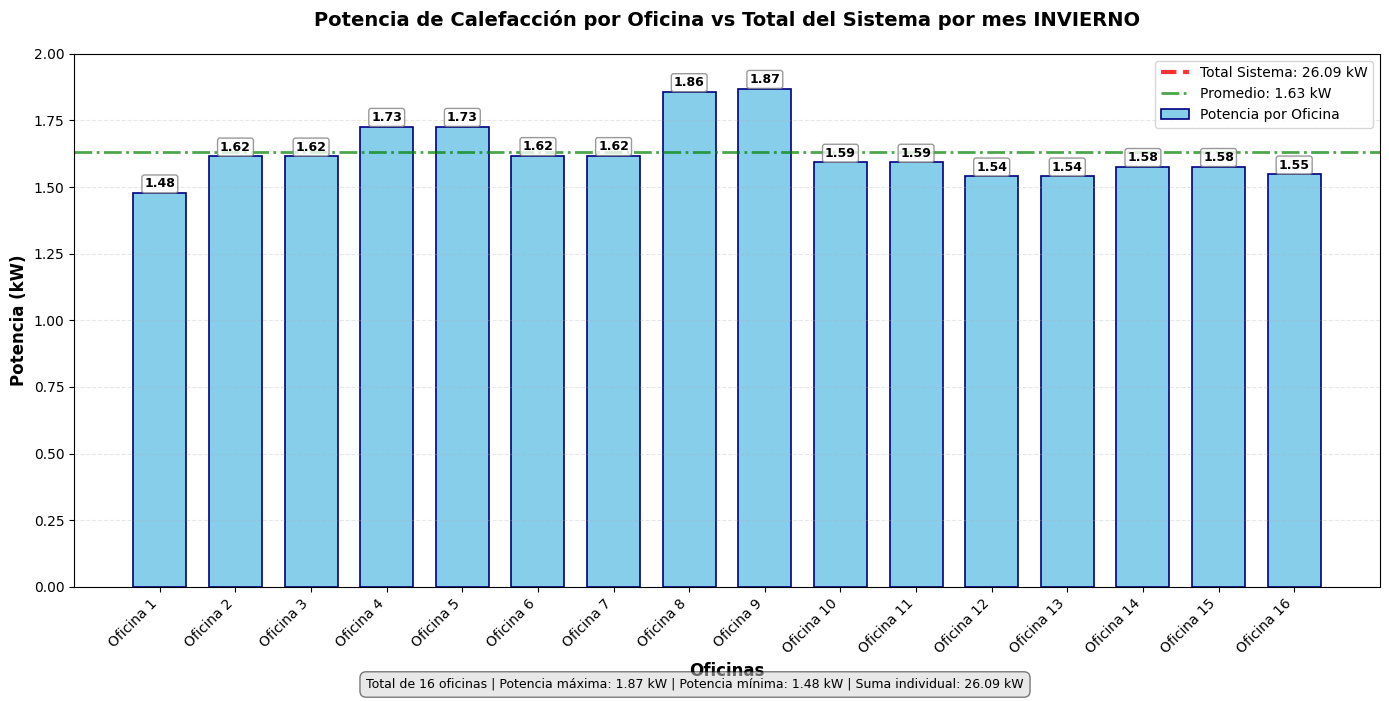

ESTADÍSTICAS DEL SISTEMA
Potencia total del sistema: 26.09 kW
Suma de potencias individuales: 26.09 kW
Diferencia (error de redondeo): 0.0000 kW
Promedio por oficina: 1.63 kW
Máxima potencia: 1.87 kW
Mínima potencia: 1.48 kW
Rango: 0.39 kW


In [26]:
grafico = histograma_oficinas_con_total(potencias, total*1e-3)

## Energía Invierno

In [27]:
Q_persona_invierno = Q_gen_personas * 10 * 22
Q_aire_dif = m * (h_interior - h_exterior_inv) * 10 * 22

total = 0
energias = {}
for oficina, perdidas in Q_oficinas_invierno.items():
    #print(perdidas)
    Q_in = perdidas*22 + Q_aire_dif - Q_persona_invierno  # Wh
    total += Q_in
    #print(f'Perdidas --> {perdidas}\nHinterior --> {h_interior}\nHexterior --> {h_exterior_inv}\nm --> {m}\nQgen --> {Q_gen_personas}')
    print(f"Potencia necesaria para calefacción en {oficina} durante un mes de invierno: {(Q_in*1e-3):.2f} kWh")
    energias[oficina] = Q_in*1e-3  # kWh
print(f"Potencia total necesaria para calefacción en todas las oficinas durante un mes de invierno: {(total*1e-3):.2f} kWh")

Potencia necesaria para calefacción en Oficina 1 durante un mes de invierno: 274.62 kWh
Potencia necesaria para calefacción en Oficina 2 durante un mes de invierno: 313.32 kWh
Potencia necesaria para calefacción en Oficina 3 durante un mes de invierno: 297.10 kWh
Potencia necesaria para calefacción en Oficina 4 durante un mes de invierno: 314.23 kWh
Potencia necesaria para calefacción en Oficina 5 durante un mes de invierno: 314.23 kWh
Potencia necesaria para calefacción en Oficina 6 durante un mes de invierno: 313.59 kWh
Potencia necesaria para calefacción en Oficina 7 durante un mes de invierno: 313.59 kWh
Potencia necesaria para calefacción en Oficina 8 durante un mes de invierno: 359.93 kWh
Potencia necesaria para calefacción en Oficina 9 durante un mes de invierno: 368.77 kWh
Potencia necesaria para calefacción en Oficina 10 durante un mes de invierno: 310.42 kWh
Potencia necesaria para calefacción en Oficina 11 durante un mes de invierno: 310.42 kWh
Potencia necesaria para calefa

In [34]:
def histograma_oficinas_con_total2(datos, total, figsize=(14, 7)):
    """
    Crea un histograma con barras para cada oficina y el total como línea
    """
    # Configurar figura
    plt.figure(figsize=figsize)
    
    # Preparar datos
    oficinas = list(datos.keys())
    potencias = list(datos.values())
    x_pos = np.arange(len(oficinas))
    
    # Crear barras para oficinas
    barras = plt.bar(x_pos, potencias, 
                    color='skyblue', 
                    edgecolor='navy',
                    linewidth=1.2,
                    width=0.7,
                    label='Potencia por Oficina')
    
    # Línea del total
    plt.axhline(y=total, 
               color='red', 
               linestyle='--', 
               linewidth=3,
               alpha=0.8,
               label=f'Total Sistema: {total:.2f} kW')
    
    # Línea del promedio
    promedio = np.mean(potencias)
    plt.axhline(y=promedio, 
               color='green', 
               linestyle='-.', 
               linewidth=2,
               alpha=0.7,
               label=f'Promedio: {promedio:.2f} kW')
    
    # Personalizar ejes
    plt.xticks(x_pos, oficinas, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Etiquetas y título
    plt.xlabel('Oficinas', fontsize=12, fontweight='bold')
    plt.ylabel('Energía (kWh)', fontsize=12, fontweight='bold')
    plt.title('Energía necesaria de Calefacción por Oficina vs Total del Sistema por mes INVIERNO', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Cuadrícula
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Leyenda
    plt.legend(loc='upper right', fontsize=10)
    
    # Añadir valores encima de las barras
    for i, (barra, potencia) in enumerate(zip(barras, potencias)):
        altura = barra.get_height()
        # Posicionar texto
        plt.text(barra.get_x() + barra.get_width()/2., 
                altura + 0.01,  # Un poco arriba de la barra
                f'{potencia:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", 
                         facecolor='white', 
                         edgecolor='gray', 
                         alpha=0.8))
    
    # Añadir anotación del total
    plt.annotate(f'TOTAL SISTEMA\n{total:.2f} kWh',
                xy=(len(oficinas)-1, total),
                xytext=(len(oficinas)-3, total + 1.5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.8),
                fontsize=11,
                fontweight='bold',
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='lightyellow', 
                         edgecolor='red'))
    
    # Ajustar límites del eje Y para mejor visualización
    plt.ylim(0,  400) 
    
    # Añadir texto informativo en la parte inferior
    plt.figtext(0.5, 0.01, 
               f'Total de {len(oficinas)} oficinas | ' +
               f'Energía máxima: {max(potencias):.2f} kWh | ' +
               f'Energía mínima: {min(potencias):.2f} kWh | ' +
               f'Suma individual: {sum(potencias):.2f} kWh',
               ha="center", 
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.5", 
                        facecolor='lightgray', 
                        alpha=0.5))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir estadísticas en consola
    print("="*70)
    print("ESTADÍSTICAS DEL SISTEMA")
    print("="*70)
    print(f"Energía total del sistema: {total:.2f} kWh")
    print(f"Suma de energias individuales: {sum(potencias):.2f} kWh")
    print(f"Diferencia (error de redondeo): {abs(total - sum(potencias)):.4f} kWh")
    print(f"Promedio por oficina: {promedio:.2f} kWh")
    print(f"Máxima energía: {max(potencias):.2f} kWh")
    print(f"Mínima energía: {min(potencias):.2f} kWh")
    print(f"Rango: {max(potencias) - min(potencias):.2f} kWh")

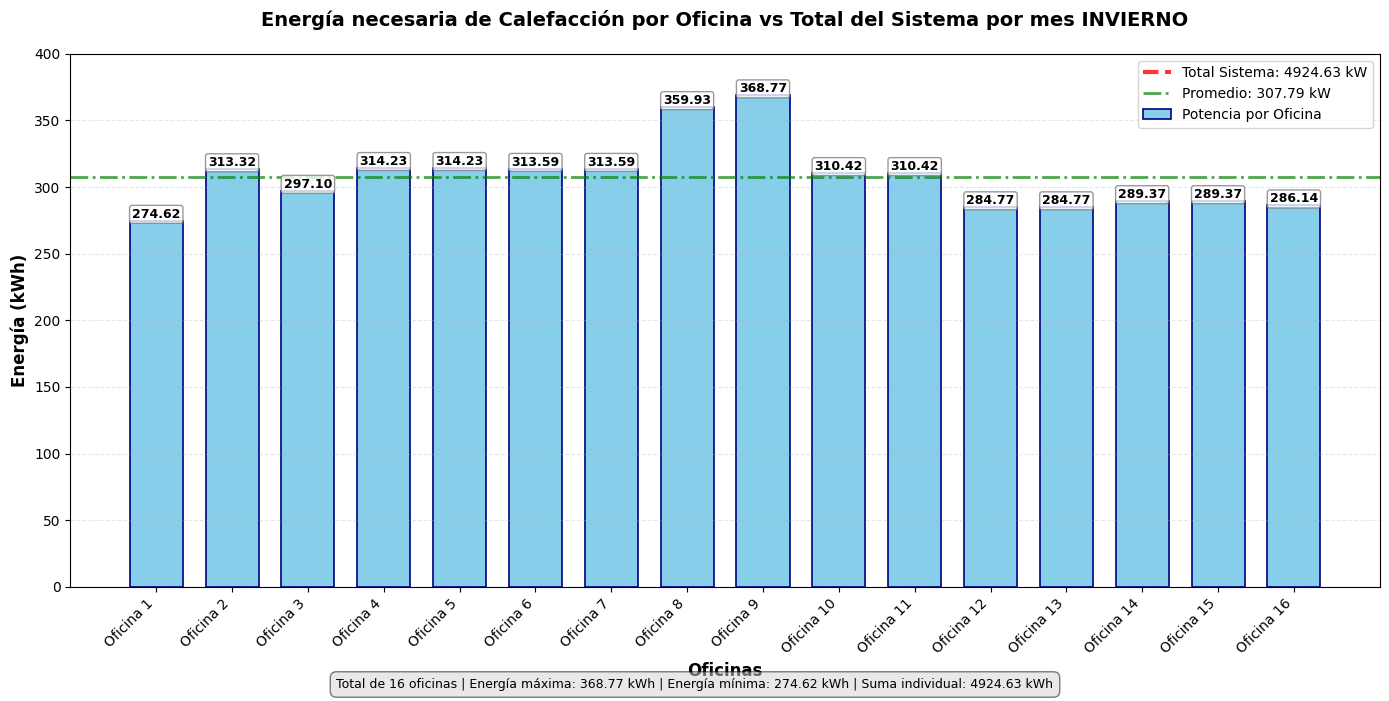

ESTADÍSTICAS DEL SISTEMA
Energía total del sistema: 4924.63 kWh
Suma de energias individuales: 4924.63 kWh
Diferencia (error de redondeo): 0.0000 kWh
Promedio por oficina: 307.79 kWh
Máxima energía: 368.77 kWh
Mínima energía: 274.62 kWh
Rango: 94.16 kWh


In [35]:
grafico = histograma_oficinas_con_total2(energias, total*1e-3)

---

## Cálculos para el verano

In [37]:
W_interior = humedad_absoluta(T_oficinas, 50)  # kJ/kg, asumiendo 50% RH interior
W_exterior_ver = humedad_absoluta(T_exterior_ver, humedad_verano)  # kJ/kg, asumiendo 80% RH exterior invierno

m = m_gen / (W_exterior_ver - W_interior)  # kg/s
print(f"Caudal de aire necesario para remover la humedad: {m:.2f} kg/s")

h_exterior_ver = entalpia_aire(T_exterior_ver, humedad_verano)  # kJ/kg
h_interior = entalpia_aire(T_oficinas, 50)  # kJ/kg

total = 0
potenciav = {}
for oficina, perdidas in dot_Q_oficinas_verano.items():
    Q_in = perdidas + m * (h_interior - h_exterior_ver) - Q_gen_personas  # W
    total += Q_in
    print(f"Potencia necesaria para climatización en {oficina} durante el verano: {Q_in*1e-3:.2f} kW")
    potenciav[oficina] = Q_in*1e-3  # kW

print(f"Potencia total necesaria para climatización durante el verano: {total*1e-3:.2f} kW")

Caudal de aire necesario para remover la humedad: 0.00 kg/s
Potencia necesaria para climatización en Oficina 1 durante el verano: 0.60 kW
Potencia necesaria para climatización en Oficina 2 durante el verano: 0.68 kW
Potencia necesaria para climatización en Oficina 3 durante el verano: 0.68 kW
Potencia necesaria para climatización en Oficina 4 durante el verano: 0.75 kW
Potencia necesaria para climatización en Oficina 5 durante el verano: 0.75 kW
Potencia necesaria para climatización en Oficina 6 durante el verano: 0.69 kW
Potencia necesaria para climatización en Oficina 7 durante el verano: 0.69 kW
Potencia necesaria para climatización en Oficina 8 durante el verano: 0.83 kW
Potencia necesaria para climatización en Oficina 9 durante el verano: 0.84 kW
Potencia necesaria para climatización en Oficina 10 durante el verano: 0.67 kW
Potencia necesaria para climatización en Oficina 11 durante el verano: 0.67 kW
Potencia necesaria para climatización en Oficina 12 durante el verano: 0.64 kW
P

In [40]:
def histograma_oficinas_con_total3(datos, total, figsize=(14, 7)):
    """
    Crea un histograma con barras para cada oficina y el total como línea
    """
    # Configurar figura
    plt.figure(figsize=figsize)
    
    # Preparar datos
    oficinas = list(datos.keys())
    potencias = list(datos.values())
    x_pos = np.arange(len(oficinas))
    
    # Crear barras para oficinas
    barras = plt.bar(x_pos, potencias, 
                    color='red', 
                    edgecolor='navy',
                    linewidth=1.2,
                    width=0.7,
                    label='Potencia por Oficina')
    
    # Línea del total
    plt.axhline(y=total, 
               color='red', 
               linestyle='--', 
               linewidth=3,
               alpha=0.8,
               label=f'Total Sistema: {total:.2f} kW')
    
    # Línea del promedio
    promedio = np.mean(potencias)
    plt.axhline(y=promedio, 
               color='green', 
               linestyle='-.', 
               linewidth=2,
               alpha=0.7,
               label=f'Promedio: {promedio:.2f} kW')
    
    # Personalizar ejes
    plt.xticks(x_pos, oficinas, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Etiquetas y título
    plt.xlabel('Oficinas', fontsize=12, fontweight='bold')
    plt.ylabel('Potencia (kW)', fontsize=12, fontweight='bold')
    plt.title('Potencia de refrigeración por Oficina vs Total del Sistema por mes VERANO', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Cuadrícula
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Leyenda
    plt.legend(loc='upper right', fontsize=10)
    
    # Añadir valores encima de las barras
    for i, (barra, potencia) in enumerate(zip(barras, potencias)):
        altura = barra.get_height()
        # Posicionar texto
        plt.text(barra.get_x() + barra.get_width()/2., 
                altura + 0.01,  # Un poco arriba de la barra
                f'{potencia:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", 
                         facecolor='white', 
                         edgecolor='gray', 
                         alpha=0.8))
    
    # Añadir anotación del total
    plt.annotate(f'TOTAL SISTEMA\n{total:.2f} kW',
                xy=(len(oficinas)-1, total),
                xytext=(len(oficinas)-3, total + 1.5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.8),
                fontsize=11,
                fontweight='bold',
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='lightyellow', 
                         edgecolor='red'))
    
    # Ajustar límites del eje Y para mejor visualización
    plt.ylim(0,  1) 
    
    # Añadir texto informativo en la parte inferior
    plt.figtext(0.5, 0.01, 
               f'Total de {len(oficinas)} oficinas | ' +
               f'Potencia máxima: {max(potencias):.2f} kW | ' +
               f'Potencia mínima: {min(potencias):.2f} kW | ' +
               f'Suma individual: {sum(potencias):.2f} kW',
               ha="center", 
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.5", 
                        facecolor='lightgray', 
                        alpha=0.5))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir estadísticas en consola
    print("="*70)
    print("ESTADÍSTICAS DEL SISTEMA")
    print("="*70)
    print(f"Potencia total del sistema: {total:.2f} kW")
    print(f"Suma de potencias individuales: {sum(potencias):.2f} kW")
    print(f"Diferencia (error de redondeo): {abs(total - sum(potencias)):.4f} kW")
    print(f"Promedio por oficina: {promedio:.2f} kW")
    print(f"Máxima potencia: {max(potencias):.2f} kW")
    print(f"Mínima potencia: {min(potencias):.2f} kW")
    print(f"Rango: {max(potencias) - min(potencias):.2f} kW")

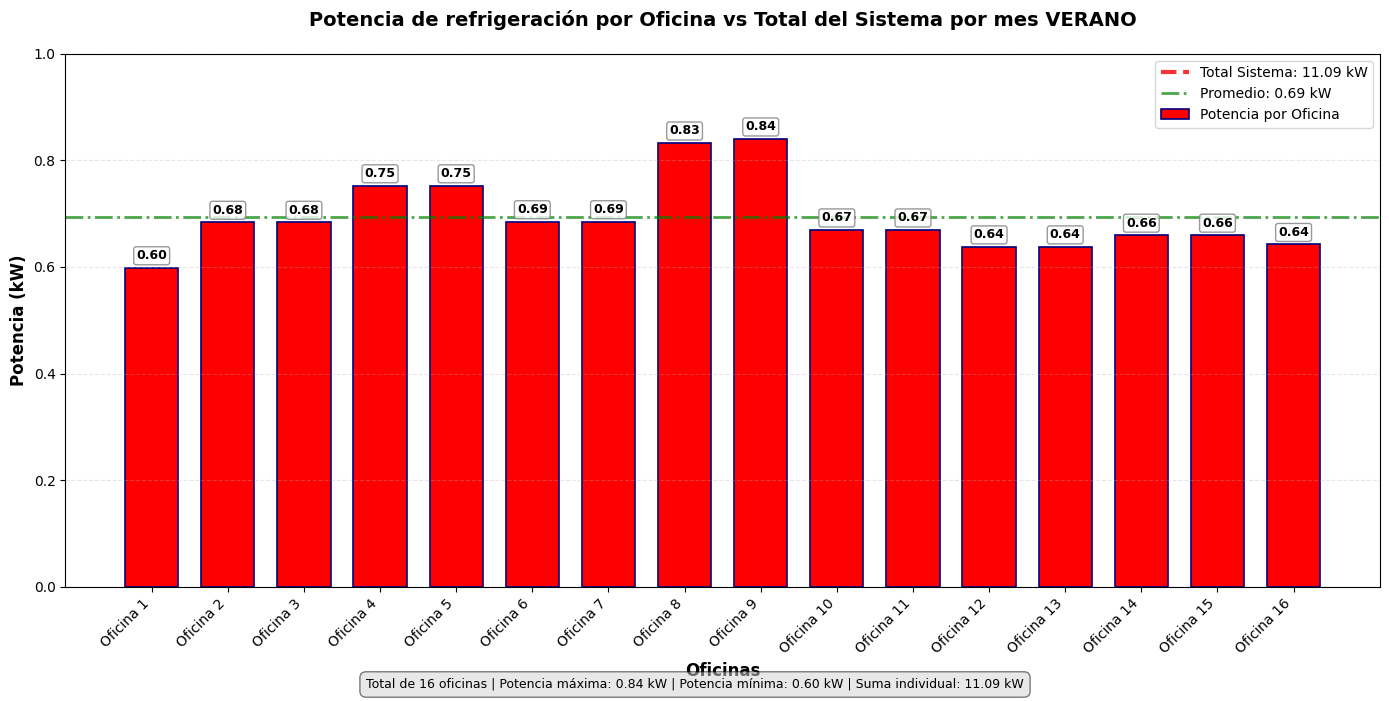

ESTADÍSTICAS DEL SISTEMA
Potencia total del sistema: 11.09 kW
Suma de potencias individuales: 11.09 kW
Diferencia (error de redondeo): 0.0000 kW
Promedio por oficina: 0.69 kW
Máxima potencia: 0.84 kW
Mínima potencia: 0.60 kW
Rango: 0.24 kW


In [41]:
grafico = histograma_oficinas_con_total3(potenciav, total*1e-3)

## Energía Verano

In [45]:
Q_persona_invierno = Q_gen_personas * 10 * 22
Q_aire_dif =  m * (h_interior - h_exterior_ver) * 10 * 22

total = 0
energiav = {}
for oficina, perdidas in Q_oficinas_verano.items():
    #print(perdidas)
    Q_in = perdidas*22 + Q_aire_dif - Q_persona_invierno  # Wh
    total += Q_in
    #print(f'Perdidas --> {perdidas}\nHinterior --> {h_interior}\nHexterior --> {h_exterior_inv}\nm --> {m}\nQgen --> {Q_gen_personas}')
    print(f"Potencia necesaria para calefacción en {oficina} durante un mes de verano: {(Q_in*1e-3):.2f} kWh")
    energiav[oficina] = Q_in*1e-3  # kWh
print(f"Potencia total necesaria para calefacción en todas las oficinas durante un mes de verano: {(total*1e-3):.2f} kWh")

Potencia necesaria para calefacción en Oficina 1 durante un mes de verano: 59.69 kWh
Potencia necesaria para calefacción en Oficina 2 durante un mes de verano: 90.25 kWh
Potencia necesaria para calefacción en Oficina 3 durante un mes de verano: 67.04 kWh
Potencia necesaria para calefacción en Oficina 4 durante un mes de verano: 71.60 kWh
Potencia necesaria para calefacción en Oficina 5 durante un mes de verano: 71.60 kWh
Potencia necesaria para calefacción en Oficina 6 durante un mes de verano: 90.32 kWh
Potencia necesaria para calefacción en Oficina 7 durante un mes de verano: 90.32 kWh
Potencia necesaria para calefacción en Oficina 8 durante un mes de verano: 113.64 kWh
Potencia necesaria para calefacción en Oficina 9 durante un mes de verano: 124.09 kWh
Potencia necesaria para calefacción en Oficina 10 durante un mes de verano: 90.26 kWh
Potencia necesaria para calefacción en Oficina 11 durante un mes de verano: 90.26 kWh
Potencia necesaria para calefacción en Oficina 12 durante un 

In [54]:
def histograma_oficinas_con_total4(datos, total, figsize=(14, 7)):
    """
    Crea un histograma con barras para cada oficina y el total como línea
    """
    # Configurar figura
    plt.figure(figsize=figsize)
    
    # Preparar datos
    oficinas = list(datos.keys())
    potencias = list(datos.values())
    x_pos = np.arange(len(oficinas))
    
    # Crear barras para oficinas
    barras = plt.bar(x_pos, potencias, 
                    color='red', 
                    edgecolor='navy',
                    linewidth=1.2,
                    width=0.7,
                    label='Energía por Oficina')
    
    # Línea del total
    plt.axhline(y=total, 
               color='red', 
               linestyle='--', 
               linewidth=3,
               alpha=0.8,
               label=f'Total Sistema: {total:.2f} kW')
    
    # Línea del promedio
    promedio = np.mean(potencias)
    plt.axhline(y=promedio, 
               color='green', 
               linestyle='-.', 
               linewidth=2,
               alpha=0.7,
               label=f'Promedio: {promedio:.2f} kW')
    
    # Personalizar ejes
    plt.xticks(x_pos, oficinas, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Etiquetas y título
    plt.xlabel('Oficinas', fontsize=12, fontweight='bold')
    plt.ylabel('Energía (kWh)', fontsize=12, fontweight='bold')
    plt.title('Energía necesaria de Calefacción por Oficina vs Total del Sistema por mes INVIERNO', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Cuadrícula
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Leyenda
    plt.legend(loc='upper right', fontsize=10)
    
    # Añadir valores encima de las barras
    for i, (barra, potencia) in enumerate(zip(barras, potencias)):
        altura = barra.get_height()
        # Posicionar texto
        plt.text(barra.get_x() + barra.get_width()/2., 
                altura + 0.01,  # Un poco arriba de la barra
                f'{potencia:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", 
                         facecolor='white', 
                         edgecolor='gray', 
                         alpha=0.8))
    
    # Añadir anotación del total
    plt.annotate(f'TOTAL SISTEMA\n{total:.2f} kWh',
                xy=(len(oficinas)-1, total),
                xytext=(len(oficinas)-3, total + 1.5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.8),
                fontsize=11,
                fontweight='bold',
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", 
                         facecolor='lightyellow', 
                         edgecolor='red'))
    
    # Ajustar límites del eje Y para mejor visualización
    plt.ylim(0,  175) 
    
    # Añadir texto informativo en la parte inferior
    plt.figtext(0.5, 0.01, 
               f'Total de {len(oficinas)} oficinas | ' +
               f'Energía máxima: {max(potencias):.2f} kWh | ' +
               f'Energía mínima: {min(potencias):.2f} kWh | ' +
               f'Suma individual: {sum(potencias):.2f} kWh',
               ha="center", 
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.5", 
                        facecolor='lightgray', 
                        alpha=0.5))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir estadísticas en consola
    print("="*70)
    print("ESTADÍSTICAS DEL SISTEMA")
    print("="*70)
    print(f"Energía total del sistema: {total:.2f} kWh")
    print(f"Suma de energias individuales: {sum(potencias):.2f} kWh")
    print(f"Diferencia (error de redondeo): {abs(total - sum(potencias)):.4f} kWh")
    print(f"Promedio por oficina: {promedio:.2f} kWh")
    print(f"Máxima energía: {max(potencias):.2f} kWh")
    print(f"Mínima energía: {min(potencias):.2f} kWh")
    print(f"Rango: {max(potencias) - min(potencias):.2f} kWh")

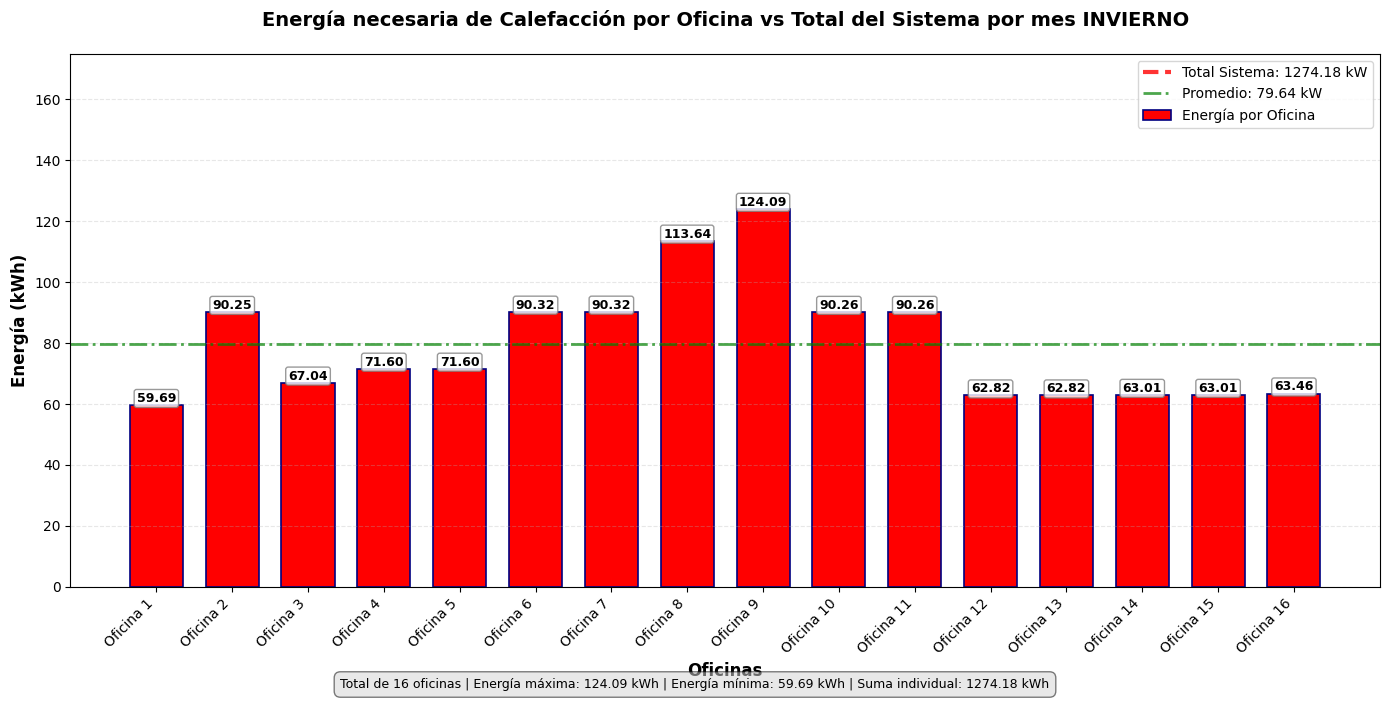

ESTADÍSTICAS DEL SISTEMA
Energía total del sistema: 1274.18 kWh
Suma de energias individuales: 1274.18 kWh
Diferencia (error de redondeo): 0.0000 kWh
Promedio por oficina: 79.64 kWh
Máxima energía: 124.09 kWh
Mínima energía: 59.69 kWh
Rango: 64.40 kWh


In [55]:
grafico = histograma_oficinas_con_total4(energiav, total*1e-3)